# Tasks 2020
Task submissions for October - December 2020
***


### Task 1
Write a Python function called counts that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values
*** 
* For this task I write a function `counts` which takes a list as an argument [1]
* Within `counts` I create an empty dictionary `d`
* Next I use a `for` loop to iterate over the list, adding a list-item to the dictionary on each iteration
* Within the `for` loop I use conditional statements to determine whether a new key-value pair should be added to the dictionary. If the key exists already, its corresponding value increases by 1
* When the `for` loop ends, the dictionary containing the list items is returned
* Finally, I call the function and print the returned dictionary to the console



[1] How to add list elements into dictionary https://stackoverflow.com/questions/30208044/how-to-add-list-elements-into-dictionary

In [1]:
# sample list as suggested in task question
l = ['A', 'A', 'B', 'C', 'A']

In [2]:
# counts() function takes a list as an argument and adds list items to dictionary
def counts(lst):
    # empy dictionary d initialised 
    d = {}
    # iterate through list items and add to dict d
    for item in lst:
        if item in d:
            d[item] += 1
        else:
            d[item] = 1
    return d

In [3]:
# call function and print to console
print(counts(l))

{'A': 3, 'B': 1, 'C': 1}


#### End
***
<br>

<br>

### Task 2
Write a Python function called dicerolls that simulates rolling dice. Your function should take two parameters: the number of dice k and the number of times to roll the dice n. The function should simulate randomly rolling k dice n times, keeping track of each total face value.  It should then return a dictionary with the number of times each possible total face value occurred.
***
* As requested by the task, the function takes two parameters: k (no. of dice) and n (no. of rolls). 
* I have used nested for loops to carry out the simulation [1]. 
* The outer loop simulates the number of times the dice are rolled while the inner loop simulates the number of dice.
* To simulate a random roll of a single die, I use the `integers()` function from `numpy.random` package
* On every iteration of the outer loop (n dice rolls), the inner loop runs k times (no. of dice)
* The results of each iteration of the inner loop are appended to list l (initialised as an empty list within the function)
* I use the function from Task 1 (above) to add each list item to dictionary d (initialised as an empty dictionary within the function)
* The function returns a sorted dictionary. I found the code for this on a discussion on stackoverflow.com [2]
* I call the `dicerolls()` 4 times. First with 2 dice, then 3, 4 and 5. The dice are rolled 100,000 times on each functon call. I plot the resuls of each bar charts. To plot a dictionary on a bar chart, I used code found on a stackoverflow.com discussion [3].
* From the bar charts, it is clear that the results are normally distributed, with the curve becoming increasingly rounded the more dice are thrown.



[1] w3schools; Python Nested Loops; https://www.w3schools.com/python/gloss_python_for_nested.asp <br>
[2] https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key%22 <br>
[3] https://stackoverflow.com/questions/21195179/plot-a-histogram-from-a-dictionary <br>

<br>

#### Build function and run simulation

In [4]:
# import default_rng for random number generation, matplotlib.pyplot for visualisation
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [5]:
# construct a new Generator object
rng = default_rng()

In [6]:
def dicerolls(k, n):
    l = [] # initialise empty list
    d = {} # initialise empty dict
    for roll in range(n): # outer loop simulates no. of times dice are rolled
        dice_sum = 0 # dice_sum counter set to 0
        for die in range(k): # inner loop simulates each of k dice thrown at random
            dice = rng.integers(1, 7)
            dice_sum += dice # face value of each dice added together
        l.append(dice_sum) 
    d = counts(l) # function from Task 1 called
    return dict(sorted(d.items()))

In [7]:
# 2 dice rolled 100,000 times and dictionary output
two_dice = dicerolls(2, 100000)
two_dice

{2: 2812,
 3: 5533,
 4: 8462,
 5: 11054,
 6: 14022,
 7: 16378,
 8: 13908,
 9: 10988,
 10: 8488,
 11: 5580,
 12: 2775}

<br>

#### Plot output: Different numbers of dice

Text(0.5, 1.0, '5 dice')

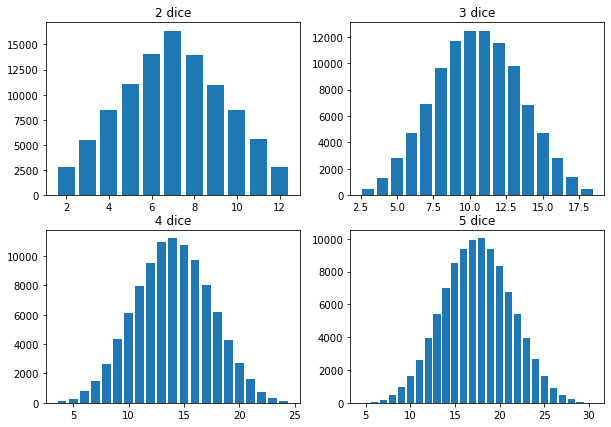

In [19]:
plt.figure(figsize=(10, 7))

plt.subplot(221)
plt.bar(list(two_dice.keys()), two_dice.values())
plt.title('2 dice')

three_dice = dicerolls(3, 100000)
plt.subplot(222)
plt.bar(list(three_dice.keys()), three_dice.values())
plt.title('3 dice')

four_dice = dicerolls(4, 100000)
plt.subplot(223)
plt.bar(list(four_dice.keys()), four_dice.values())
plt.title('4 dice')

five_dice = dicerolls(5, 100000)
plt.subplot(224)
plt.bar(list(five_dice.keys()), five_dice.values())
plt.title('5 dice')

#### End